In [1]:
import json
import calendar
import random
from datetime import date, timedelta
import faker
import numpy as np
from pandas import DataFrame
from delorean import parse
import pandas as pd

pd.set_option('display.mpl_style', 'default')

c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2847: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
fake = faker.Faker()

In [3]:
usernames = set()
usernames_no = 1000
# populate the set with 1000 unique usernames
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())
    


In [4]:
def get_random_name_and_gender():
    skew = .6 # 60% of users will be female
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'
    
def get_users(usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max=90),
            'address': fake.address(),
        }
        users.append(json.dumps(user))  #轉成json格式
    return users

users = get_users(usernames)
users[:3]

['{"username": "jodisimon", "name": "Mary Baxter", "gender": "F", "email": "theresa81@gmail.com", "age": 84, "address": "87147 Kimberly Row\\nLake Chelseashire, NM 60133"}',
 '{"username": "haasfrancisco", "name": "Diane Miller", "gender": "F", "email": "ajones@yahoo.com", "age": 26, "address": "43386 George Flat Apt. 861\\nEast Joanna, WI 01769"}',
 '{"username": "fisherteresa", "name": "Michael Nichols", "gender": "M", "email": "joshuamason@gmail.com", "age": 70, "address": "196 Morgan Wall Apt. 795\\nNorth Emilytown, PR 63169"}']

In [5]:
# campaign name format:
# InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency
def get_type():
    # just some gibberish internal codes
    types = ['AKX', 'BYU', 'GRZ', 'KTR']
    return random.choice(types)

def get_start_end_dates():
    duration = random.randint(1, 2 * 365)
    offset = random.randint(-365, 365)
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    def _format_date(date_):
        return date_.strftime("%Y%m%d")

    return _format_date(start), _format_date(end)

def get_age():
    age = random.randint(20, 45)
    age -= age % 5
    diff = random.randint(5, 25)
    diff -= diff % 5
    return '{}-{}'.format(age, age + diff)

def get_gender():
    return random.choice(('M', 'F', 'B'))

def get_currency():
    return random.choice(('GBP', 'EUR', 'USD'))

def get_campaign_name():
    separator = '_'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join((type_, start_end, age, gender, currency))


get_campaign_name()

'AKX_20161207_20170829_40-50_B_USD'

In [6]:
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6)
    spent = random.randint(10**2, budget)
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))  
    #triangular(low, high, mode) 是從low和high之間取數值，並讓值盡量落在mode附近
    impressions = int(random.gauss(0.5 * 10**6, 2))  #高斯分布
    return {
        'cmp_name': name,
        'cmp_bgt': budget,
        'cmp_spent': spent,
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }

get_campaign_data()

{'cmp_bgt': 513562,
 'cmp_clicks': 56291,
 'cmp_impr': 500001,
 'cmp_name': 'BYU_20170317_20180805_25-30_F_USD',
 'cmp_spent': 205960}

In [7]:
def get_data(users):
    data = []
    for user in users:
        campaigns = [get_campaign_data() for _ in range(random.randint(2, 8))]
        data.append({'user': user, 'campaigns': campaigns})
    return data



In [8]:
rough_data = get_data(users)
rough_data[:2] # let's take a peek

[{'campaigns': [{'cmp_bgt': 270611,
    'cmp_clicks': 12507,
    'cmp_impr': 500003,
    'cmp_name': 'KTR_20180421_20200103_40-50_B_GBP',
    'cmp_spent': 202888},
   {'cmp_bgt': 291451,
    'cmp_clicks': 4392,
    'cmp_impr': 500001,
    'cmp_name': 'AKX_20180727_20190910_35-60_M_GBP',
    'cmp_spent': 259862},
   {'cmp_bgt': 564080,
    'cmp_clicks': 18098,
    'cmp_impr': 500000,
    'cmp_name': 'AKX_20161113_20180719_35-40_M_GBP',
    'cmp_spent': 198094},
   {'cmp_bgt': 384015,
    'cmp_clicks': 40882,
    'cmp_impr': 500002,
    'cmp_name': 'BYU_20170129_20170622_40-50_M_USD',
    'cmp_spent': 86255}],
  'user': '{"username": "jodisimon", "name": "Mary Baxter", "gender": "F", "email": "theresa81@gmail.com", "age": 84, "address": "87147 Kimberly Row\\nLake Chelseashire, NM 60133"}'},
 {'campaigns': [{'cmp_bgt': 909964,
    'cmp_clicks': 32602,
    'cmp_impr': 499995,
    'cmp_name': 'KTR_20171226_20180721_40-55_B_USD',
    'cmp_spent': 179856},
   {'cmp_bgt': 303620,
    'cmp_clic

In [9]:
data = []
for datum in rough_data:
    for campaign in datum['campaigns']:
        campaign.update({'user': datum['user']})
        data.append(campaign)
data[:2] # let's take another peek

[{'cmp_bgt': 270611,
  'cmp_clicks': 12507,
  'cmp_impr': 500003,
  'cmp_name': 'KTR_20180421_20200103_40-50_B_GBP',
  'cmp_spent': 202888,
  'user': '{"username": "jodisimon", "name": "Mary Baxter", "gender": "F", "email": "theresa81@gmail.com", "age": 84, "address": "87147 Kimberly Row\\nLake Chelseashire, NM 60133"}'},
 {'cmp_bgt': 291451,
  'cmp_clicks': 4392,
  'cmp_impr': 500001,
  'cmp_name': 'AKX_20180727_20190910_35-60_M_GBP',
  'cmp_spent': 259862,
  'user': '{"username": "jodisimon", "name": "Mary Baxter", "gender": "F", "email": "theresa81@gmail.com", "age": 84, "address": "87147 Kimberly Row\\nLake Chelseashire, NM 60133"}'}]

In [10]:
df = DataFrame(data)
df.head()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
0,270611,12507,500003,KTR_20180421_20200103_40-50_B_GBP,202888,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter..."
1,291451,4392,500001,AKX_20180727_20190910_35-60_M_GBP,259862,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter..."
2,564080,18098,500000,AKX_20161113_20180719_35-40_M_GBP,198094,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter..."
3,384015,40882,500002,BYU_20170129_20170622_40-50_M_USD,86255,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter..."
4,909964,32602,499995,KTR_20171226_20180721_40-55_B_USD,179856,"{""username"": ""haasfrancisco"", ""name"": ""Diane M..."


In [11]:
df.count()

cmp_bgt       4940
cmp_clicks    4940
cmp_impr      4940
cmp_name      4940
cmp_spent     4940
user          4940
dtype: int64

In [12]:
df.describe()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_spent
count,4940.000000,4940.000000,4940.000000,4940.000000
mean,500071.061943,39580.766397,499999.500202,250057.712551
std,287504.980924,21391.639350,2.031489,218537.151126
min,1370.000000,350.000000,499992.000000,143.000000
25%,244348.500000,22389.750000,499998.000000,68380.500000
50%,505093.000000,36389.000000,499999.000000,187961.500000
75%,745460.500000,54640.500000,500001.000000,381672.000000
max,999825.000000,98788.000000,500007.000000,983441.000000


In [13]:
df.sort_values(by=['cmp_bgt'], ascending=False).head(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
2156,999825,8784,499999,KTR_20180422_20200119_25-45_M_EUR,267750,"{""username"": ""philip13"", ""name"": ""Sarah Rivera..."
2826,999724,34095,499994,KTR_20160816_20170612_20-35_F_USD,645739,"{""username"": ""jonesmike"", ""name"": ""Mary Marsha..."
2906,999580,22117,500002,AKX_20171206_20190202_20-30_B_USD,137283,"{""username"": ""qbrown"", ""name"": ""Brandy Moore"",..."


In [14]:
def unpack_campaign_name(name):
    # very optimistic method, assumes data in campaign name
    # is always in good state
    type_, start, end, age, gender, currency = name.split('_')
    start = parse(start).date
    end = parse(end).date
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = ['Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame(campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head()


,Type,Start,End,Age,Gender,Currency
0,KTR,2018-04-21,2020-03-01,40-50,B,GBP
1,AKX,2018-07-27,2019-10-09,35-60,M,GBP
2,AKX,2016-11-13,2018-07-19,35-40,M,GBP
3,BYU,2017-01-29,2017-06-22,40-50,M,USD
4,KTR,2017-12-26,2018-07-21,40-55,B,USD


In [15]:
df = df.join(campaign_df)
df

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user,Type,Start,End,Age,Gender,Currency
0,270611,12507,500003,KTR_20180421_20200103_40-50_B_GBP,202888,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",KTR,2018-04-21,2020-03-01,40-50,B,GBP
1,291451,4392,500001,AKX_20180727_20190910_35-60_M_GBP,259862,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2018-07-27,2019-10-09,35-60,M,GBP
2,564080,18098,500000,AKX_20161113_20180719_35-40_M_GBP,198094,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2016-11-13,2018-07-19,35-40,M,GBP
3,384015,40882,500002,BYU_20170129_20170622_40-50_M_USD,86255,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",BYU,2017-01-29,2017-06-22,40-50,M,USD
4,909964,32602,499995,KTR_20171226_20180721_40-55_B_USD,179856,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",KTR,2017-12-26,2018-07-21,40-55,B,USD
5,303620,22570,499995,BYU_20161102_20170531_40-65_B_GBP,48649,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2016-02-11,2017-05-31,40-65,B,GBP
6,664824,22731,499999,GRZ_20180223_20190309_40-60_B_GBP,400779,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",GRZ,2018-02-23,2019-09-03,40-60,B,GBP
7,286253,61262,499999,BYU_20170913_20180130_25-30_F_USD,110649,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2017-09-13,2018-01-30,25-30,F,USD
8,124244,57525,499999,BYU_20171124_20190126_20-35_B_GBP,109242,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2017-11-24,2019-01-26,20-35,B,GBP
9,82271,46619,500000,KTR_20171012_20181012_40-50_F_USD,37472,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",KTR,2017-12-10,2018-12-10,40-50,F,USD


In [16]:
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,KTR_20180421_20200103_40-50_B_GBP,KTR,2018-04-21,2020-03-01,40-50,B,GBP
1,AKX_20180727_20190910_35-60_M_GBP,AKX,2018-07-27,2019-10-09,35-60,M,GBP
2,AKX_20161113_20180719_35-40_M_GBP,AKX,2016-11-13,2018-07-19,35-40,M,GBP


In [17]:
def unpack_user_json(user):
    # very optimistic as well, expects user objects
    # to have all attributes
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]

user_data = df['user'].apply(unpack_user_json)
user_cols = ['username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(user_data.tolist(), columns=user_cols, index=df.index)
df = df.join(user_df)
df[['user'] + user_cols].head(2)

,user,username,email,name,gender,age,address
0,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133"
1,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133"


In [18]:
better_columns = [
    'Budget', 'Clicks', 'Impressions',
    'cmp_name', 'Spent', 'user',
    'Type', 'Start', 'End',
    'Target Age', 'Target Gender', 'Currency',
    'Username', 'Email', 'Name',
    'Gender', 'Age', 'Address',
]
df.columns = better_columns
df.head()

,Budget,Clicks,Impressions,cmp_name,Spent,user,Type,Start,End,Target Age,Target Gender,Currency,Username,Email,Name,Gender,Age,Address
0,270611,12507,500003,KTR_20180421_20200103_40-50_B_GBP,202888,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",KTR,2018-04-21,2020-03-01,40-50,B,GBP,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133"
1,291451,4392,500001,AKX_20180727_20190910_35-60_M_GBP,259862,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2018-07-27,2019-10-09,35-60,M,GBP,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133"
2,564080,18098,500000,AKX_20161113_20180719_35-40_M_GBP,198094,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2016-11-13,2018-07-19,35-40,M,GBP,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133"
3,384015,40882,500002,BYU_20170129_20170622_40-50_M_USD,86255,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",BYU,2017-01-29,2017-06-22,40-50,M,USD,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133"
4,909964,32602,499995,KTR_20171226_20180721_40-55_B_USD,179856,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",KTR,2017-12-26,2018-07-21,40-55,B,USD,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769"


In [19]:
def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    # Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
calculate_extra_columns(df)
df

,Budget,Clicks,Impressions,cmp_name,Spent,user,Type,Start,End,Target Age,...,Currency,Username,Email,Name,Gender,Age,Address,CTR,CPC,CPI
0,270611,12507,500003,KTR_20180421_20200103_40-50_B_GBP,202888,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",KTR,2018-04-21,2020-03-01,40-50,...,GBP,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.025014,16.221956,0.405774
1,291451,4392,500001,AKX_20180727_20190910_35-60_M_GBP,259862,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2018-07-27,2019-10-09,35-60,...,GBP,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.008784,59.167122,0.519723
2,564080,18098,500000,AKX_20161113_20180719_35-40_M_GBP,198094,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2016-11-13,2018-07-19,35-40,...,GBP,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.036196,10.945629,0.396188
3,384015,40882,500002,BYU_20170129_20170622_40-50_M_USD,86255,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",BYU,2017-01-29,2017-06-22,40-50,...,USD,jodisimon,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.081764,2.109853,0.172509
4,909964,32602,499995,KTR_20171226_20180721_40-55_B_USD,179856,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",KTR,2017-12-26,2018-07-21,40-55,...,USD,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.065205,5.516717,0.359716
5,303620,22570,499995,BYU_20161102_20170531_40-65_B_GBP,48649,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2016-02-11,2017-05-31,40-65,...,GBP,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.045140,2.155472,0.097299
6,664824,22731,499999,GRZ_20180223_20190309_40-60_B_GBP,400779,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",GRZ,2018-02-23,2019-09-03,40-60,...,GBP,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.045462,17.631384,0.801560
7,286253,61262,499999,BYU_20170913_20180130_25-30_F_USD,110649,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2017-09-13,2018-01-30,25-30,...,USD,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.122524,1.806160,0.221298
8,124244,57525,499999,BYU_20171124_20190126_20-35_B_GBP,109242,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2017-11-24,2019-01-26,20-35,...,GBP,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.115050,1.899035,0.218484
9,82271,46619,500000,KTR_20171012_20181012_40-50_F_USD,37472,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",KTR,2017-12-10,2018-12-10,40-50,...,USD,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.093238,0.803792,0.074944


In [20]:
df[['Spent', 'Clicks', 'Impressions','CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,202888,12507,500003,0.025014,16.221956,0.405774
1,259862,4392,500001,0.008784,59.167122,0.519723
2,198094,18098,500000,0.036196,10.945629,0.396188


In [21]:
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]
CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]
print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.0250138499169 0.0250138499169
CPC: 16.2219557048 16.2219557048
CPI: 0.405773565359 0.405773565359


In [22]:
def get_day_of_the_week(day):
    #取得那天是星期幾
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()]
def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)
df

,Budget,Clicks,Impressions,cmp_name,Spent,user,Type,Start,End,Target Age,...,Email,Name,Gender,Age,Address,CTR,CPC,CPI,Day of Week,Duration
0,270611,12507,500003,KTR_20180421_20200103_40-50_B_GBP,202888,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",KTR,2018-04-21,2020-03-01,40-50,...,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.025014,16.221956,0.405774,Saturday,680
1,291451,4392,500001,AKX_20180727_20190910_35-60_M_GBP,259862,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2018-07-27,2019-10-09,35-60,...,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.008784,59.167122,0.519723,Friday,439
2,564080,18098,500000,AKX_20161113_20180719_35-40_M_GBP,198094,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",AKX,2016-11-13,2018-07-19,35-40,...,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.036196,10.945629,0.396188,Sunday,613
3,384015,40882,500002,BYU_20170129_20170622_40-50_M_USD,86255,"{""username"": ""jodisimon"", ""name"": ""Mary Baxter...",BYU,2017-01-29,2017-06-22,40-50,...,theresa81@gmail.com,Mary Baxter,F,84,"87147 Kimberly Row\nLake Chelseashire, NM 60133",0.081764,2.109853,0.172509,Sunday,144
4,909964,32602,499995,KTR_20171226_20180721_40-55_B_USD,179856,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",KTR,2017-12-26,2018-07-21,40-55,...,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.065205,5.516717,0.359716,Tuesday,207
5,303620,22570,499995,BYU_20161102_20170531_40-65_B_GBP,48649,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2016-02-11,2017-05-31,40-65,...,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.045140,2.155472,0.097299,Thursday,475
6,664824,22731,499999,GRZ_20180223_20190309_40-60_B_GBP,400779,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",GRZ,2018-02-23,2019-09-03,40-60,...,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.045462,17.631384,0.801560,Friday,557
7,286253,61262,499999,BYU_20170913_20180130_25-30_F_USD,110649,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2017-09-13,2018-01-30,25-30,...,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.122524,1.806160,0.221298,Wednesday,139
8,124244,57525,499999,BYU_20171124_20190126_20-35_B_GBP,109242,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",BYU,2017-11-24,2019-01-26,20-35,...,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.115050,1.899035,0.218484,Friday,428
9,82271,46619,500000,KTR_20171012_20181012_40-50_F_USD,37472,"{""username"": ""haasfrancisco"", ""name"": ""Diane M...",KTR,2017-12-10,2018-12-10,40-50,...,ajones@yahoo.com,Diane Miller,F,26,"43386 George Flat Apt. 861\nEast Joanna, WI 01769",0.093238,0.803792,0.074944,Sunday,365


In [23]:
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2018-04-21,2020-03-01,680,Saturday
1,2018-07-27,2019-10-09,439,Friday
2,2016-11-13,2018-07-19,613,Sunday


In [24]:
# Cleaning everything up
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
    'Name', 'Gender', 'Age'
]
df = df[final_columns]
df

,Type,Start,End,Duration,Day of Week,Budget,Currency,Clicks,Impressions,Spent,CTR,CPC,CPI,Target Age,Target Gender,Username,Email,Name,Gender,Age
0,KTR,2018-04-21,2020-03-01,680,Saturday,270611,GBP,12507,500003,202888,0.025014,16.221956,0.405774,40-50,B,jodisimon,theresa81@gmail.com,Mary Baxter,F,84
1,AKX,2018-07-27,2019-10-09,439,Friday,291451,GBP,4392,500001,259862,0.008784,59.167122,0.519723,35-60,M,jodisimon,theresa81@gmail.com,Mary Baxter,F,84
2,AKX,2016-11-13,2018-07-19,613,Sunday,564080,GBP,18098,500000,198094,0.036196,10.945629,0.396188,35-40,M,jodisimon,theresa81@gmail.com,Mary Baxter,F,84
3,BYU,2017-01-29,2017-06-22,144,Sunday,384015,USD,40882,500002,86255,0.081764,2.109853,0.172509,40-50,M,jodisimon,theresa81@gmail.com,Mary Baxter,F,84
4,KTR,2017-12-26,2018-07-21,207,Tuesday,909964,USD,32602,499995,179856,0.065205,5.516717,0.359716,40-55,B,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26
5,BYU,2016-02-11,2017-05-31,475,Thursday,303620,GBP,22570,499995,48649,0.045140,2.155472,0.097299,40-65,B,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26
6,GRZ,2018-02-23,2019-09-03,557,Friday,664824,GBP,22731,499999,400779,0.045462,17.631384,0.801560,40-60,B,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26
7,BYU,2017-09-13,2018-01-30,139,Wednesday,286253,USD,61262,499999,110649,0.122524,1.806160,0.221298,25-30,F,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26
8,BYU,2017-11-24,2019-01-26,428,Friday,124244,GBP,57525,499999,109242,0.115050,1.899035,0.218484,20-35,B,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26
9,KTR,2017-12-10,2018-12-10,365,Sunday,82271,USD,46619,500000,37472,0.093238,0.803792,0.074944,40-50,F,haasfrancisco,ajones@yahoo.com,Diane Miller,F,26


In [25]:
df.to_csv('df.csv')
df.to_json('df.json')
df.to_excel('df.xls')

In [26]:
%matplotlib inline

In [27]:
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

In [28]:
df.describe()

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000
mean,369.887045,500071.061943,39580.766397,499999.500202,250057.712551,0.079162,10.829849,0.500116,53.940486
std,245.039105,287504.980924,21391.639350,2.031489,218537.151126,0.042783,44.418119,0.437075,21.425634
min,-330.000000,1370.000000,350.000000,499992.000000,143.000000,0.000700,0.003852,0.000286,18.000000
25%,177.000000,244348.500000,22389.750000,499998.000000,68380.500000,0.044779,1.778242,0.136761,36.000000
50%,372.000000,505093.000000,36389.000000,499999.000000,187961.500000,0.072778,5.220578,0.375925,53.000000
75%,559.000000,745460.500000,54640.500000,500001.000000,381672.000000,0.109281,11.777518,0.763341,73.000000
max,1062.000000,999825.000000,98788.000000,500007.000000,983441.000000,0.197577,2427.814286,1.966874,90.000000


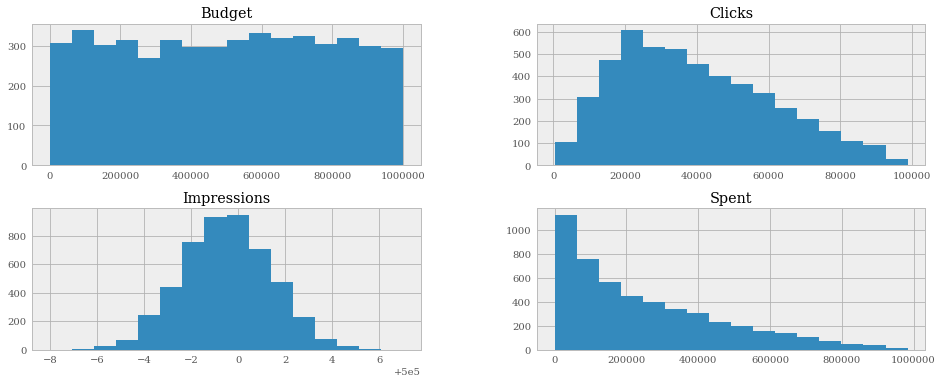

In [29]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E4B976438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021E4B7D20B8>]], dtype=object)

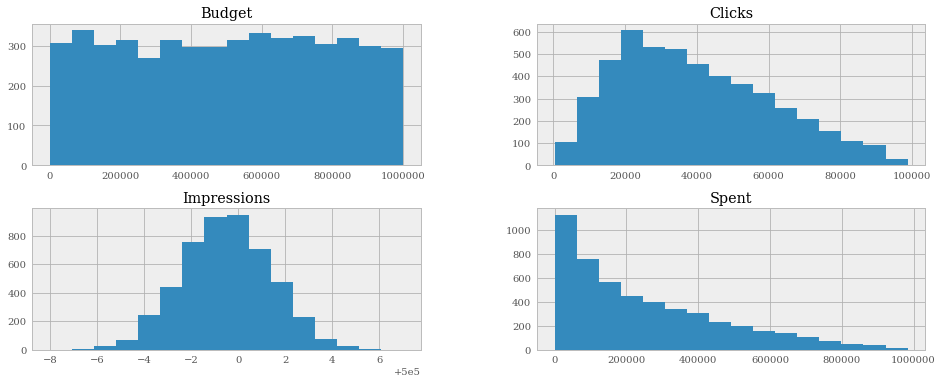

In [30]:
# 分號的差別
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6))

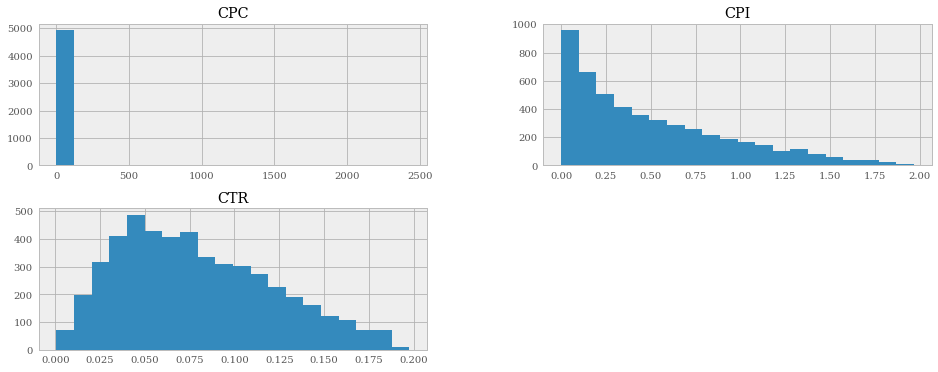

In [31]:
df[['CTR', 'CPC', 'CPI']].hist(bins=20, figsize=(16, 6));

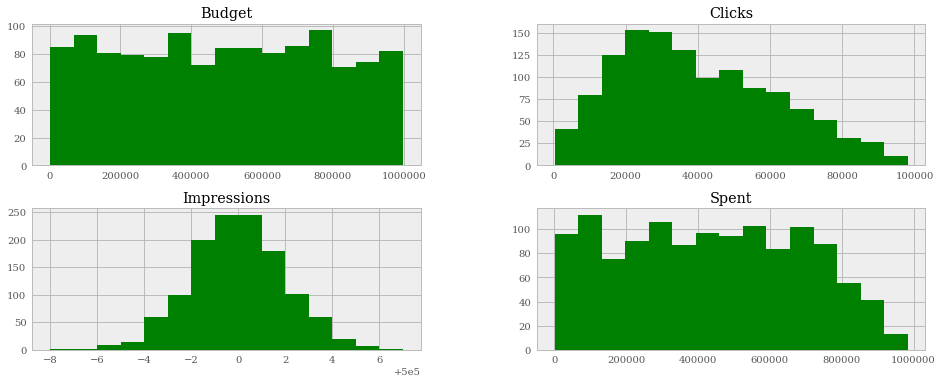

In [32]:
# mask用法記下來
# dict也可以用
mask = (df.Spent > 0.75 * df.Budget)
df[mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=15, figsize=(16, 6), color='g');


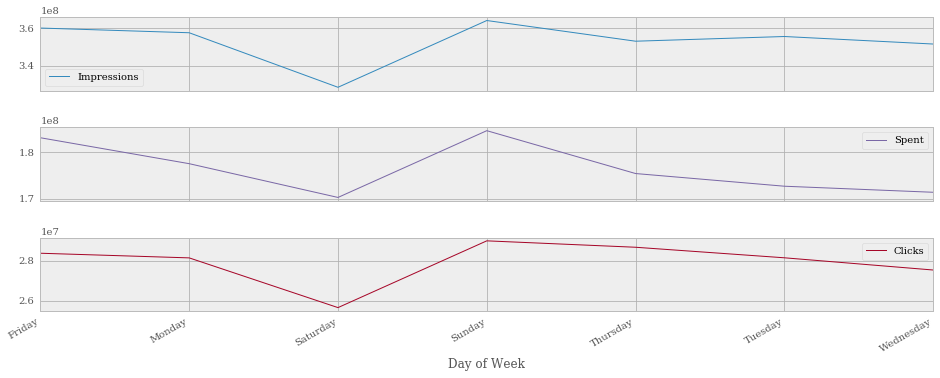

In [33]:
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(figsize=(16, 6), subplots=True);


In [45]:
# 裡面參數設為巢狀DICT意思為 description/function as key/value pairs
# 後面value為公式，可用describe()去看
agg_config = {
    'Impressions': {
        'Mean Impr': 'mean',
        'Std Impr': 'std',
    },
    'Spent': ['mean', 'std', 'count', 'min'],
}
df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

c:\python36\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Impressions                    Spent  \
                              Mean Impr  Std Impr           mean   
Target Gender Target Age                                           
B             20-25       499999.583333  2.040091  254642.888889   
              20-30       499999.402778  1.835946  247907.833333   
              20-35       499999.328571  2.345031  285229.157143   
              20-40       499999.655172  2.209007  258262.563218   
              20-45       499999.857143  2.080522  277237.380952   
              25-30       499999.781609  1.774662  256627.310345   
              25-35       499999.707692  2.119280  260482.938462   
              25-40       499999.171875  1.923577  235413.781250   
              25-45       499999.597015  2.181601  252022.850746   
              25-50       499999.583333  1.443376  211106.916667   
              30-35       499999.614286  2.162211  241470.857143   
              30-40       499999.619565  1.982575  247173.706522   
              30-45       499999.629032  1.875064  210142.532258   
              30-50       499999.543210  1.803118  276023.000000   
              30-55       499999.625000  2.156386  252316.312500   
              35-40       499999.500000  2.169485  307885.736842   
              35-45       499999.563380  1.887798  266117.450704   
              35-50       499999.561644  1.914755  230844.506849   
              35-55       500000.106061  2.000990  256183.333333   
              35-60       499999.055556  2.042842  199526.333333   
              40-45       499999.647887  1.986372  218239.507042   
              40-50       499999.279070  1.925990  209340.186047   
              40-55       499999.301370  2.171053  271731.863014   
              40-60       499999.500000  1.965215  230760.920455   
              40-65       499999.600000  2.443651  240050.266667   
              45-50       499999.615385  1.850156  280676.153846   
              45-55       499999.826087  1.945909  300323.826087   
              45-60       499999.650000  2.412140  256270.450000   
              45-65       499999.235294  2.658228  242255.705882   
              45-70       499997.666667  1.527525  155126.666667   
...                                 ...       ...            ...   
M             20-25       499999.547945  2.248710  235281.726027   
              20-30       499999.394737  1.904934  300349.342105   
              20-35       499999.589041  1.832088  261748.904110   
              20-40       499999.448718  1.842129  298633.205128   
              20-45       500000.333333  1.825742  272980.833333   
              25-30       499999.737705  2.365739  199686.967213   
              25-35       499999.526316  1.935450  224382.263158   
              25-40       499999.489796  2.475904  270233.836735   
              25-45       499999.550000  2.140034  273647.387500   
              25-50       499998.411765  1.872793  165769.647059   
              30-35       499999.219178  2.148944  244271.589041   
              30-40       499999.428571  2.096038  252221.457143   
              30-45       499999.666667  2.038947  215555.722222   
              30-50       499999.446809  2.293596  275182.361702   
              30-55       499999.235294  1.921243  207625.000000   
              35-40       499999.537634  1.879866  238051.010753   
              35-45       499999.457143  1.893434  244515.685714   
              35-50       499999.054795  2.080935  227810.287671   
              35-55       499999.619718  2.072722  261242.929577   
              35-60       499999.133333  2.356349  174155.133333   
              40-45       499999.000000  1.697056  222038.078947   
              40-50       499999.726027  1.952635  218419.794521   
              40-55       499999.662651  1.698472  266035.819277   
              40-60       499999.510417  2.137361  235625.218750   
              40-65       499999.565217  1.590486  266132.695652   
              45

In [47]:
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)
pivot

Clicks                   Impressions                      \
Target Gender        B        F        M           B         F         M   
Target Age                                                                 
20-25          2677658  2367970  3073140    35999970  33999964  36499967   
20-30          2784025  2457404  2941927    35999957  34499976  37999954   
20-35          2641196  3083927  3066469    34999953  40499955  36499970   
20-40          3528599  2824718  3443659    43499970  35999954  38999957   
20-45           702183   669472   441639    10499997   7999992   6000004   
25-30          3102394  2397015  2611784    43499981  32999970  30499984   
25-35          2666292  2993220  2818505    32499981  36499982  37999964   
25-40          2728341  2984263  1986469    31999947  41999932  24499975   
25-45          2916843  2542861  3203911    33499973  35499952  39999964   
25-50           561397   362640   606564     5999995   4499987   8499973   
30-35          2705604  3841273  2839995    34999973  46999980  36499943   
30-40          3240083  2998977  2816891    45999965  37499990  34999960   
30-45          2681270  2008838  3988668    30999977  26999944  44999970   
30-50          3230618  2727699  3724930    40499963  35499968  46999948   
30-55           565517   567353   625528     7999994   7000000   8499987   
35-40          2863218  2702737  3565370    37999962  35499939  46499957   
35-45          2686927  2915843  2915415    35499969  33999977  34999962   
35-50          3068661  2856304  2814754    36499968  34999997  36499931   
35-55          2490324  2341449  3112556    33000007  30499981  35499973   
35-60           704226   836505   582767     8999983   8999985   7499987   
40-45          2869849  2590117  3066651    35499975  32999972  37999924   
40-50          3394553  3112702  2700050    42999938  40999936  36499980   
40-55          2842103  2947773  3221846    36499949  38499939  41499972   
40-60          3800778  3922768  4127526    43999956  49499962  47999953   
40-65           622947   382347  1038543     7499994   6499976  11499990   
45-50           603139   605393   553365     6499995   6999987   5499999   
45-55          1003963   579045   851898    11499996   7000000  11999992   
45-60           660727   294005   542999     9999993   5000001   6999990   
45-65           733863   869970  1068451     8499987  10499973  10499984   
45-70           111947   110427    92456     1499993   1999993    999992   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          18334288  14866479  17175566  
20-30          17849364  19241556  22826550  
20-35          19966041  17165904  19107670  
20-40          22468843  16258994  23293390  
20-45           5821985   4298367   3275770  
25-30          22326576  18301784  12180905  
25-35          16931391  19296929  17053052  
25-40          15066482  19778549  13241458  
25-45          16885531  17327775  21891791  
25-50           2533283   1972173   2818084  
30-35          16902960  24153861  17831826  
30-40          22739981  20759840  17655502  
30-45          13028837  14714041  19400015  
30-50          22357863  14735277  25867142  
30-55           4037061   5060232   3529625  
35-40          23399316  19167437  22138744  
35-45          18894339  16468350  17116098  
35-50          16851649  19651632  16630151  
35-55          16908100  12186975  18548248  
35-60           3591474   4765670   2612327  
40-45          15495005  18727044  16874894  
40-50          18003256  20561326  15944645  
40-55          19836426  19460701  22080973  
40-60          20306961  24001969  22620021  
40-65           3600754   3287488   6121052  
45-50           3648790   4486937   3616432  
45-55           6907448   4202762   5474837  
45-60           5125409   3394357   3913367  
45-65           4118347   5512013   5060674  
45-70            465380    875208  